<a href="https://colab.research.google.com/github/lays-l/alura_imersao_dados_04/blob/main/imersao_alura_04_imoveis_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01
[Link](https://www.alura.com.br/imersao-dados-4/aula01-colab-python-pandas?utm_source=ActiveCampaign&utm_medium=email&utm_content=%5BImers%C3%A3o+Dados%5D+Aula+1+Liberada%21+%F0%9F%94%90&utm_campaign=%5BImers%C3%A3o%5D+%28Dados%29+Libera%C3%A7%C3%A3o+Aula+01&vgo_ee=YJKRzO0PVif%2B2qwrY3DlqQA3SuMkJhmkGexv49sZvNU%3D) da aula

In [1]:
import pandas as pd

dados = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv')
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3410,Rua Kansas,Brooklin Paulista,São Paulo,300,3,6,3,R$ 2.350.000
4778,Rua Valença,Sumaré,São Paulo,280,4,7,3,R$ 2.600.000
208,NaN,Parque Boturussu,São Paulo,60,2,5,1,R$ 251.000
1992,NaN,Perdizes,São Paulo,200,3,3,2,R$ 1.380.000
128,"Rua Manoel João Pereira, 80",Vila Matilde,São Paulo,131,3,2,2,R$ 540.000
2444,Rua Boquim,Vila Ida,São Paulo,235,3,3,5,R$ 2.500.000
822,Rua Açaré,Alto de Pinheiros,São Paulo,215,3,3,3,R$ 2.240.000
6970,Rua Marquês de Maricá,Sacomã,São Paulo,440,2,3,8,R$ 640.000
493,"Rua Turiassu, 189",Perdizes,São Paulo,300,8,4,1,R$ 2.000.000
8105,"Rua Pascoal Gomes de Lima, 87",Tremembé,São Paulo,100,3,2,6,R$ 531.000


In [3]:
dados['Bairro'][6522]

'Vila Paulo Silas'

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [5]:
dados['Metragem'].mean()

442.30065947242207

In [6]:
#quantidade de registros onde o bairro é "Vila Mariana"
sum(dados['Bairro'] == 'Vila Mariana')

184

In [7]:
# salva em um novo df somente os registros onde o bairro é = Vila Mariana
tem_imoveis_vila = dados['Bairro'] == 'Vila Mariana'
imoveis_vila_mariana = dados[tem_imoveis_vila]

In [8]:
# Tira a média da metragem dos imoveis na Vila Mariana, baseado no último df criado
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

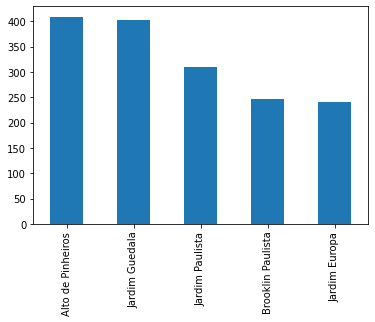

In [9]:
n_imoveis_bairro = dados['Bairro'].value_counts()
n_imoveis_bairro.head(5).plot.bar()



---


##**DESAFIOS AULA 01**

###**1 - Realizar a média da metragem para cada um dos bairros.**

In [10]:
media_por_bairro = dados.groupby('Bairro')['Metragem'].mean()
media_por_bairro.head(5)

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
Name: Metragem, dtype: float64

###**2 - Duas formas de selecionar os dados por bairro**

In [11]:
primeira_forma = dados['Bairro'].value_counts() #aqui eu seleciono pela serie de dados Bairro e mostro os valores totais para cada ocorrência
segunda_forma = dados.loc[:, 'Bairro'].unique() #aqui eu uso o loc para trazer todos os bairros em uma série e uso o unique() para listar os valores únicos (poderia ser também utilizado o value_counts aqui)

###**3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.**

###**4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max)**

*Informações da quantidade, valor mínimo, valor máximo, média e mediana da quantidade de quartos por bairro*

In [12]:
met_por_bairro_quartos = dados.groupby(['Bairro', 'Quartos'])['Metragem'].agg([len,min,max, 'mean', 'median'])
met_por_bairro_quartos.head(12)

len  min   max        mean  median
Bairro            Quartos                                    
Aclimação         2          6  104   300  193.166667   202.5
                  3         57  120   480  223.175439   208.0
                  4         18  140  1500  348.555556   305.5
                  5          5  300   345  322.000000   320.0
                  6          2  250   255  252.500000   252.5
Alto da Boa Vista 4          7  315   595  421.571429   370.0
                  5          1  400   400  400.000000   400.0
Alto da Lapa      1          3   46   135   89.666667    88.0
                  2         11   99   270  137.272727   120.0
                  3         46   80   710  276.217391   253.0
                  4         22  150  1133  420.181818   330.0
                  5          4  219   500  396.000000   432.5

*Informações da quantidade, valor mínimo, valor máximo, média e mediana da quantidade de banheiro por bairro*

In [13]:
met_por_quartos_banheiros = dados.groupby(['Quartos', 'Banheiros'])['Metragem'].agg([len,min,max, 'mean', 'median'])
met_por_quartos_banheiros.head(14)

len  min   max        mean  median
Quartos Banheiros                                    
1       1           65   29   833  155.661538    95.0
        2           19   37   205  102.526316   100.0
        3           13  160  1000  304.307692   245.0
        4            3  223   305  276.000000   300.0
        5            2  797   802  799.500000   799.5
        6            2  700   705  702.500000   702.5
        7            3  375   380  378.333333   380.0
2       1          391   36  1050  140.677749   120.0
        2          470   45  1105  136.534043   120.0
        3          231   54   681  173.982684   150.0
        4           80   70   760  241.162500   200.0
        5           18   60   550  285.166667   232.5
        6            4  303   400  371.250000   391.0
        7            1  440   440  440.000000   440.0

*Media de banheiros por Bairro ordenados do maior para o menor*

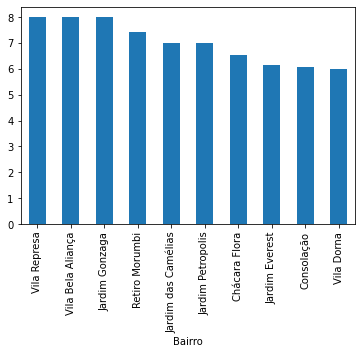

In [14]:
mean_banheiros_bairro = dados.groupby(['Bairro'])['Banheiros'].mean()
mean_banheiros_bairro.sort_values(ascending=False).head(10).plot.bar()

In [15]:
frequencia_q = dados['Quartos'].value_counts().sort_index()
percentual_q = dados['Quartos'].value_counts(normalize = True).sort_index() * 100

frequencia_b = dados['Banheiros'].value_counts().sort_index()
percentual_b = dados['Banheiros'].value_counts(normalize = True).sort_index() * 100

*Frequencia absoluta e porcentagem pelo número de quartos*

*Podemos observar que há uma concentração maior de locais com 3 e 4 quartos respectivamente e uma frequência menor para locais com 10 quartos ou mais*

In [16]:
dist_freq_quartos = pd.DataFrame({'Frequência': frequencia_q, 'Porcentagem(%)': percentual_q})
dist_freq_quartos
#dist_freq_quartos.loc[:6]

,Frequência,Porcentagem(%)
1,107,1.069145
2,1195,11.940448
3,4213,42.096323
4,3309,33.063549
5,859,8.583133
6,217,2.168265
7,56,0.559552
8,20,0.199840
9,12,0.119904
10,8,0.079936


*Frequencia absoluta e porcentagem pelo número de banheiros*

*Podemos observar que a maior parte do número de banheiros está mais concentrada (de forma distribuída) na faixa entre 1-6, totalizando 91%*

In [17]:
dist_freq_banheiros = pd.DataFrame({'Frequência': frequencia_b, 'Porcentagem(%)': percentual_b})
dist_freq_banheiros

,Frequência,Porcentagem(%)
1,1034,10.331735
2,1632,16.306954
3,1952,19.504396
4,1838,18.365308
5,1615,16.137090
6,1037,10.361711
7,488,4.876099
8,284,2.837730
9,62,0.619504
10,36,0.359712


In [18]:
dist_freq_banheiros.loc[:6, ['Porcentagem(%)']].sum()

Porcentagem(%)    91.007194
dtype: float64

*Aqui separo os imoveis que contêm 10 ou mais quartos e mostro o sumarizado*

In [19]:
df_muitos_quartos = dados.loc[dados['Quartos'] >= 10]
df_muitos_quartos.groupby(['Quartos']).describe()

Metragem                                                            \
           count    mean         std    min     25%    50%     75%     max   
Quartos                                                                      
10           8.0  622.75  321.588801  378.0  383.00  441.5  837.50  1105.0   
11           6.0  380.00  319.765539  145.0  191.25  272.5  387.50  1000.0   
12           2.0  523.50  221.324423  367.0  445.25  523.5  601.75   680.0   
13           1.0  450.00         NaN  450.0  450.00  450.0  450.00   450.0   
15           1.0  480.00         NaN  480.0  480.00  480.0  480.00   480.0   
16           2.0  282.50    3.535534  280.0  281.25  282.5  283.75   285.0   

        Banheiros       ...           Vagas                                    \
            count mean  ...  75%  max count       mean       std   min    25%   
Quartos                 ...                                                     
10            8.0  8.0  ...  8.0  8.0   8.0   9.375000  2.445842   8.0   8.00   
11            6.0  6.0  ...  8.0  8.0   6.0   4.833333  4.020779   2.0   2.00   
12            2.0  5.0  ...  5.0  5.0   2.0   3.500000  0.707107   3.0   3.25   
13            1.0  7.0  ...  7.0  7.0   1.0   7.000000       NaN   7.0   7.00   
15            1.0  8.0  ...  8.0  8.0   1.0  12.000000       NaN  12.0  12.00   
16            2.0  3.0  ...  3.0  3.0   2.0   3.000000  0.000000   3.0   3.00   

                            
          50%    75%   max  
Quartos                     
10        8.0  10.00  15.0  
11        2.5   8.25  10.0  
12        3.5   3.75   4.0  
13        7.0   7.00   7.0  
15       12.0  12.00  12.0  
16        3.0   3.00   3.0  

[6 rows x 24 columns]

*Quantidade de ocorrências, valor mínimo, valor máximo e média da metragem por quantidade de quartos acima de 10*

*E gráfico com os valores mín, máx e média*



In [20]:
df_muitos_quartos.groupby(['Quartos'])['Metragem'].agg([len,min,max,'mean'])

,len,min,max,mean
Quartos,,,,
10,8,378,1105,622.75
11,6,145,1000,380.00
12,2,367,680,523.50
13,1,450,450,450.00
15,1,480,480,480.00
16,2,280,285,282.50


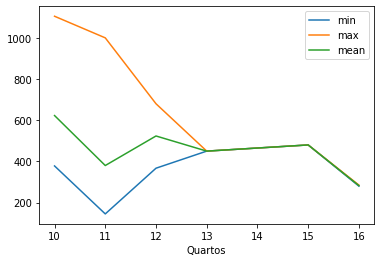

In [21]:
sumarizado_muitos_quartos = df_muitos_quartos.groupby(['Quartos'])['Metragem'].agg([min,max,'mean'])
sumarizado_muitos_quartos.plot.line()

*Gráfico da média de banheiros por quantidade de quartos acima de 10*

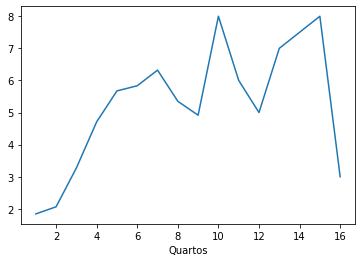

In [22]:
mean_banheiros_por_quartos = dados.groupby(['Quartos'])['Banheiros'].mean()
mean_banheiros_por_quartos.plot.line()

###**5 - Descobrir quais são os bairros que não tem nome de rua.**

*Contagem de quantas ocorrências por bairro onde o nome da rua não foi informado*

In [23]:
bairros_sem_rua = dados.loc[dados['Rua'].isnull()]['Bairro'].value_counts()
bairros_sem_rua

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64



---



In [24]:
import re
df_alterado = dados.copy()
df_alterado['Valor'] = df_alterado['Valor'].map(lambda v: re.sub('[^0-9]', '', v))
df_alterado['Valor'].astype('float64')

#obs: verificar pois há valores que estão indicados "por mês". Nesse caso pode ser considerado um valor multiplicado ou uma nova coluna que indique essa informação

0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10003     665000.0
10004    2300000.0
10005    1050000.0
10006       2200.0
10007     270000.0
Name: Valor, Length: 10008, dtype: float64


---

#**Aula 02**
[Link](https://www.alura.com.br/imersao-dados-4/aula02-tratamento-dados-primeiros-graficos?utm_source=ActiveCampaign&utm_medium=email&utm_content=%5BImers%C3%A3o+Dados%5D+Bora+para+a+Aula+2+%F0%9F%8F%83%F0%9F%8F%BC%E2%80%8D%E2%99%80%EF%B8%8F%F0%9F%8F%83%F0%9F%8F%BB&utm_campaign=%5BImers%C3%A3o%5D+%28Dados%29+Libera%C3%A7%C3%A3o+Aula+02&vgo_ee=YJKRzO0PVif%2B2qwrY3DlqQA3SuMkJhmkGexv49sZvNU%3D) da aula

In [25]:
#dados['Valor'].str.split(expand = True) # transforma os campos splitados em um novo dataframe
dados['Valor'].str.split(expand = True)[0].unique() # verificar se os valores da primeira coluna não conterá algum valor 

array(['R$'], dtype=object)

In [26]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [27]:
#retorna somente os registros onde o campo tipo_anuncio é nulo e confirma se todos os dados estão como nulos mesmo
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [28]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [29]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


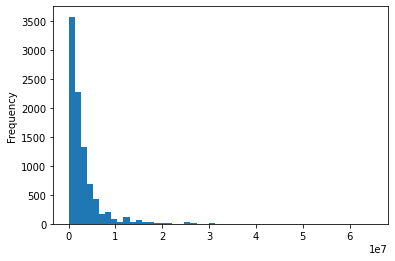

In [30]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 50)

In [31]:
pd.set_option('display.precision',2) #limita para 2 casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' %x) #remove a notação científica
dados_vendas.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [32]:
dados_vendas[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


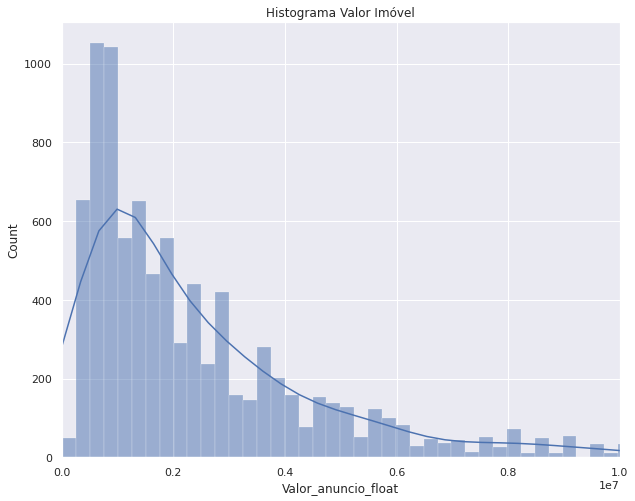

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #estiliza o gráfico plotado
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados_vendas, x='Valor_anuncio_float', kde=True) #kde = curva de aproximação
ax.set_title('Histograma Valor Imóvel')
plt.xlim((-50, 10000000)) #limita o valor até 10 milhões
plt.show()



---
##**DESAFIOS AULA 02**


### 1. Criar uma escala de valores em milhões
### 2. Deixar o gráfico do histograma de valores legível (alterar as labels, escala (milhões), cores) e deixar o gráfico de uma forma que uma pessoa leia e entenda o que está sendo apresentado.
### 3. Preço do m² por bairro e plotar em um gráfico ideal (dispersão?)
### 4. Pesquisar uma visualização para analisar os quartis, mediana e outliers

In [34]:
dados_vendas.drop(['Moeda', 'Valor_anuncio', 'Tipo_anuncio'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
dados_vendas['Valor_anuncio_float'].describe()

count       9156.00
mean     3052202.96
std      3944208.19
min        13000.00
25%       890000.00
50%      1800000.00
75%      3500000.00
max     65000000.00
Name: Valor_anuncio_float, dtype: float64

In [36]:
dados_vendas['valor_escala_milhao'] = (dados_vendas['Valor_anuncio_float'] / 1000000) #utilizando uma escala em milhões
dados_vendas['valor_escala_milhao'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count   9156.00
mean       3.05
std        3.94
min        0.01
25%        0.89
50%        1.80
75%        3.50
max       65.00
Name: valor_escala_milhao, dtype: float64

*Uso do numpy para verificar uma possível faixa de valores e criação de uma nova coluna com a faixa de valores*

In [37]:
import numpy as np
np.set_printoptions(precision = 2, suppress = True) #remove notação cientifica e limita 2 casas decimais para números inteiros

In [38]:
bins_teste = np.linspace(min(dados_vendas['Valor_anuncio_float']), max(dados_vendas['Valor_anuncio_float']),5)
bins_teste

array([   13000., 16259750., 32506500., 48753250., 65000000.])

In [39]:
bins = [0, 200000, 500000, 1000000, 10000000, 65000000]
faixas = ['até 200mil', '200 mil a 500 mil', '500 mil a 1 milhão', '1 milhão até 10 milhões', 'acima de 10 milhões']

In [40]:
#dados_vendas.drop(['faixa_valor_venda'], axis=1, inplace=True)
dados_vendas['faixa_valor_venda'] = pd.cut(dados_vendas['Valor_anuncio_float'], bins, labels=faixas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
dados_vendas['faixa_valor_venda'].value_counts()

1 milhão até 10 milhões    5931
500 mil a 1 milhão         2110
200 mil a 500 mil           670
acima de 10 milhões         428
até 200mil                   17
Name: faixa_valor_venda, dtype: int64

*Gráfico legível estilizado para melhor entendimento da relação de Quantidade de Imóveis x Valor*

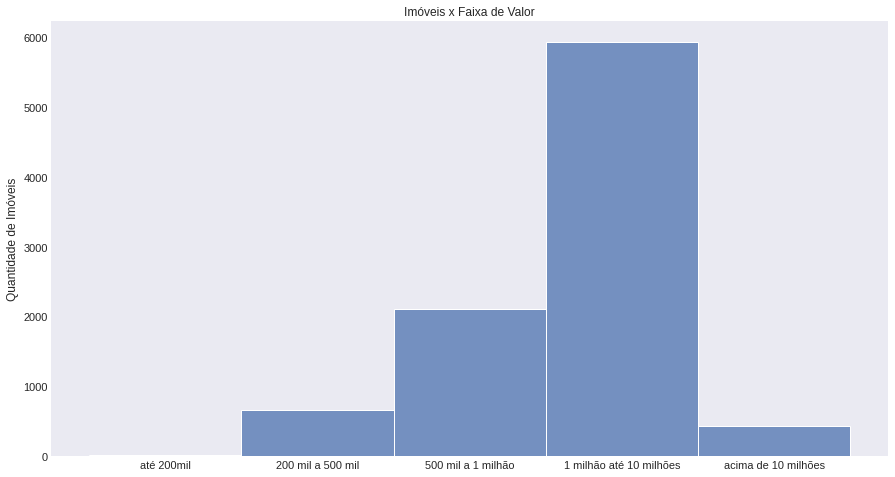

In [42]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,8))
ax = sns.histplot(data=dados_vendas, x='faixa_valor_venda')
ax.set_title('Imóveis x Faixa de Valor')
ax.set_xlabel('')
ax.set_ylabel('Quantidade de Imóveis')
plt.show()

*Separando os dados pela média por bairro em um novo dataframe para criar um dashboard do valor do m² por bairro.*

*Obs: não estou considerando aqui os outliers*

In [72]:
sumarizado_bairro = dados_vendas.groupby('Bairro').mean()
sumarizado_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,valor_escala_milhao
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93


In [73]:
sumarizado_bairro['valor_m2'] = sumarizado_bairro['Valor_anuncio_float'] / sumarizado_bairro['Metragem']

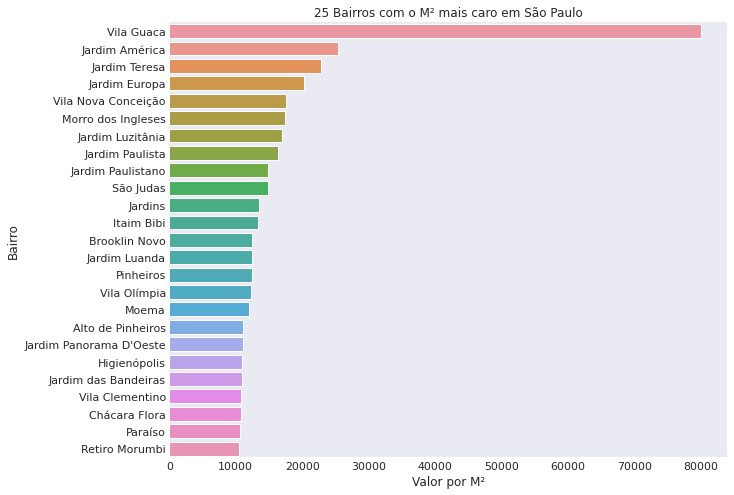

In [95]:
sns.set_style('dark')
plt.figure(figsize=(10, 8))

ax1 = sns.barplot(x=sumarizado_bairro.nlargest(25,'valor_m2')['valor_m2'],y=sumarizado_bairro.nlargest(25,'valor_m2')['valor_m2'].index)
ax1.set(xlabel = "Valor por M²", ylabel = "Bairro", title = "25 Bairros com o M² mais caro em São Paulo")
plt.show()
